# quant-econ Solutions: The Lucas Asset Pricing Model

Solutions for http://quant-econ.net/jl/markov_asset.html

In [1]:
using QuantEcon
include("asset_pricing.jl")
include("../lucas_model/lucastree.jl")
using PyPlot

## Exercise 1

In [2]:
# == Define primitives == #
n = 5
P = 0.0125 .* ones(n, n) 
P .+= diagm(0.95 .- 0.0125 .* ones(5))
s = [1.05, 1.025, 1.0, 0.975, 0.95]
gamm = 2.0
bet = 0.94
zet = 1.0
ap = AssetPrices(bet, P, s, gamm)

v = tree_price(ap)
println("Lucas Tree Prices: $v\n")

v_consol = consol_price(ap, 1.0)
println("Consol Bond Prices: $(v_consol)\n")

P_tilde = P .* s'.^(1-gamm)
temp = bet .* (P_tilde * v) + bet * (P_tilde * ones(n))
println("Should be 0: $(temp - v)\n") 

p_s = 150.0
w_bar, w_bars = call_option(ap, zet, p_s, [10, 20, 30]);

Lucas Tree Prices: [12.722217630644252,14.725150017725886,17.571422357262904,21.9357066112197,29.474015777144995]



## Exercise 2

Consol Bond Prices: [87.5686013853112,109.25108965024711,148.67554548466475,242.55144081989457,753.8710047641986]

Should be 0: [0.0,1.7763568394002505e-15,0.0,0.0,0.0]



/home/chase/.julia/v0.4/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


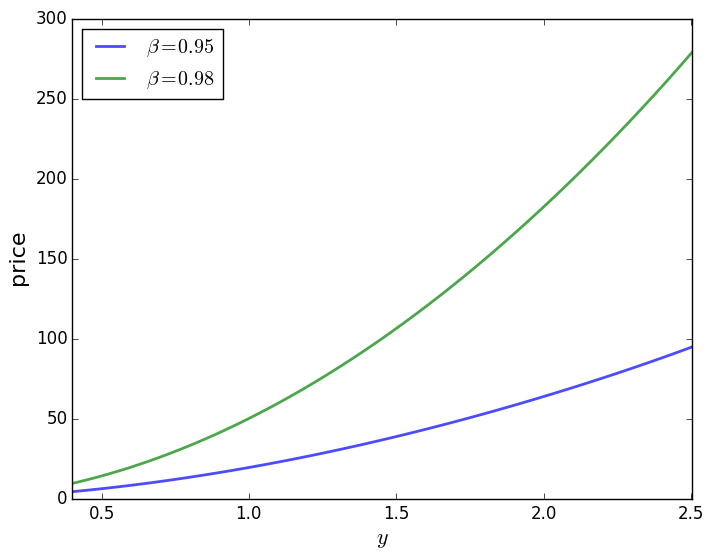

In [3]:
fig, ax = subplots()

ax[:set_xlabel](L"$y$", fontsize=16)
ax[:set_ylabel]("price", fontsize=16)

for bet in (0.95, 0.98)
    tree = LucasTree(2.0, bet, 0.90, 0.1)
    my_grid = collect(tree.grid)
    price_vals = compute_lt_price(tree)
    label = LaTeXString("\$\\beta =$(bet)\$")
    ax[:plot](collect(my_grid), price_vals, lw=2, alpha=0.7, label=label)
    ax[:set_xlim](minimum(my_grid), maximum(my_grid));
end

ax[:legend](loc="upper left")
fig[:show]()
